In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from keras import *
from PIL import Image
from keras.models import *
from keras.layers import Input, Dense
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
#from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import glob
import os.path
from keras.models import load_model
import skimage
from skimage.transform import resize
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import os
categories = os.listdir('/kaggle/input/real-and-fake-face-detection/real_and_fake_face')

In [ ]:
categories

['training_fake', 'training_real']

In [ ]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical

# Function to load and process an image
def process_image(photo, categories):
    img = cv2.imread(photo,cv2.IMREAD_GRAYSCALE)
    img = skimage.transform.resize(img, (224, 224, 3))
    # img = image.load_img(photo, target_size=(64, 64))
    tr_x = image.img_to_array(img)
    label = (photo.split("/"))[-2]
    label_place = categories.index(label)
    return tr_x, label_place

# Function to load data
def load_data(path, categories):
    x_train = []
    y_train = []
    images = glob.glob(path + "/**/*")

    for photo in images:
        tr_x, label_place = process_image(photo, categories)
        x_train.append(tr_x)
        y_train.append(label_place)

    return np.array(x_train), to_categorical(y_train)


# Loading DATASET

In [ ]:
X, Y = load_data("/kaggle/input/real-and-fake-face-detection/real_and_fake_face",categories)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(type(Y_train))
print(Y_train.shape)
print(X_train.shape)

<class 'numpy.ndarray'>
(1632, 2)
(1632, 224, 224, 3)


In [ ]:
print(Y_test.shape)
print(X_test.shape)

(409, 2)
(409, 224, 224, 3)


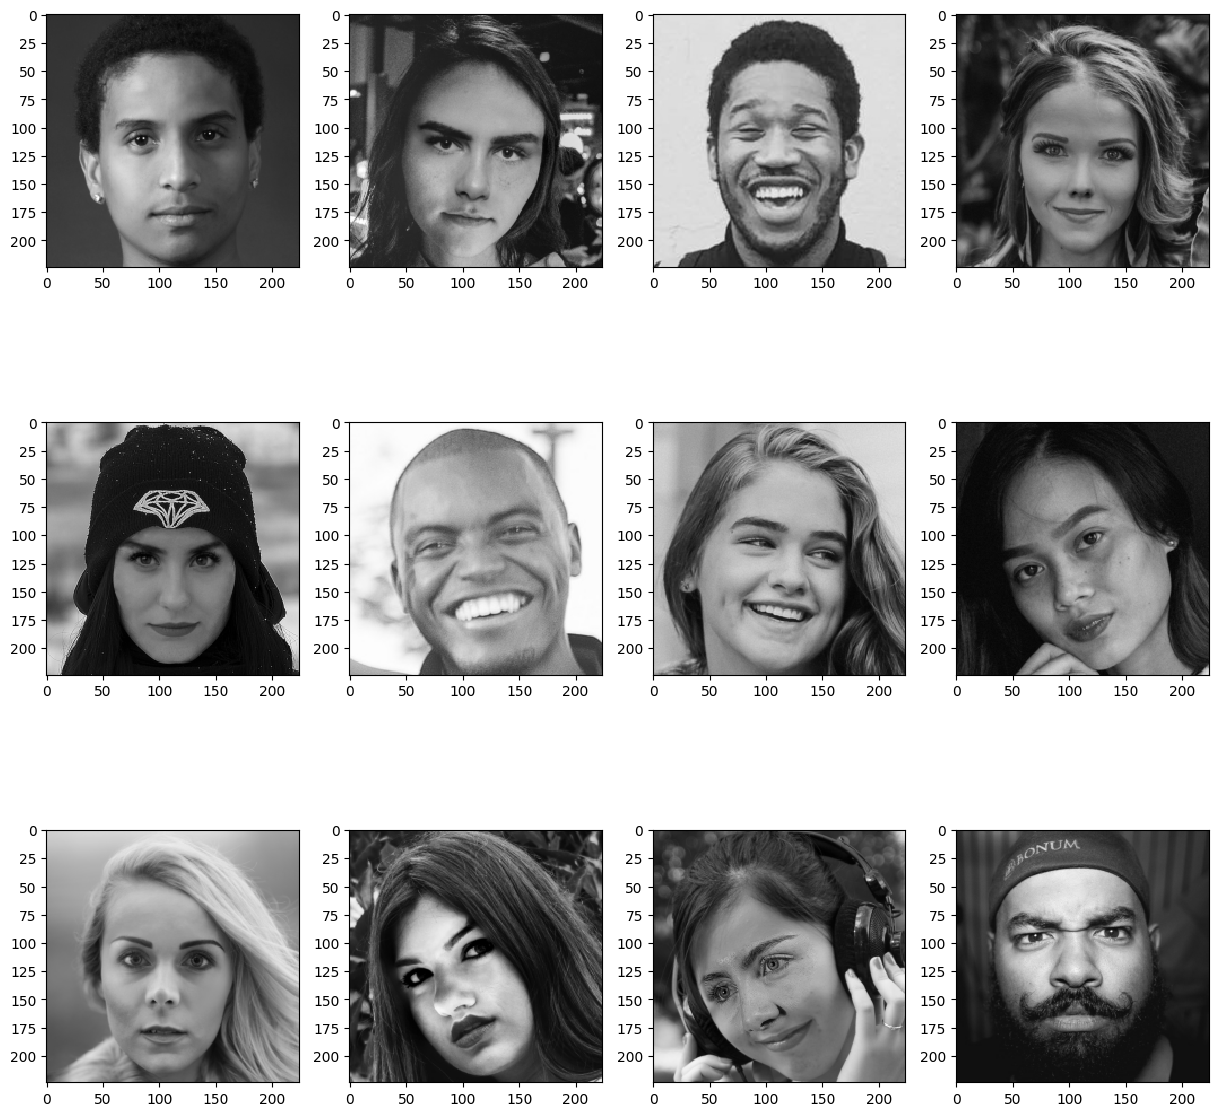

In [ ]:
# Display Some Images
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    # ax.title.set_text(Y_train[i])
    plt.imshow(X_train[i], interpolation='nearest')
    
plt.show()

In [ ]:
# ##########################################
# ###############n LSTM

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GRU, LSTM, Reshape
# from tensorflow.keras.utils import to_categorical

# img_size = 300
# sequence_length = 1

# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(MaxPooling2D((2, 2)))

# # Add another Conv2D layer with 64 filters to capture more complex image features
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Add another Conv2D layer with 128 filters for more feature extraction
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Flatten the output to feed into the LSTM layer
# model.add(Flatten())

# # Reshape output to (None, sequence_length, feature_dim)
# model.add(Reshape((sequence_length, -1)))


# model.add(LSTM(512, return_sequences=True))

# # Flatten the LSTM output
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# # Add another fully connected layer with 256 units for more complex relationships
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(len(categories), activation='softmax'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

img_size = 224

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, Y_train,
                    batch_size=64,
                    epochs=50,
                    shuffle=True,
                    validation_data=(X_test, Y_test),
                    callbacks=[checkpoint],
                    verbose=1)

Epoch 1/50
26/26 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5674
Epoch 1: val_accuracy improved from -inf to 0.56479, saving model to best_model.h5
26/26 [==============================] - 4s 156ms/step - loss: 0.6880 - accuracy: 0.5674 - val_loss: 0.6802 - val_accuracy: 0.5648
Epoch 2/50
26/26 [==============================] - ETA: 0s - loss: 0.6671 - accuracy: 0.6103
Epoch 2: val_accuracy did not improve from 0.56479
26/26 [==============================] - 3s 102ms/step - loss: 0.6671 - accuracy: 0.6103 - val_loss: 0.6954 - val_accuracy: 0.5183
Epoch 3/50
26/26 [==============================] - ETA: 0s - loss: 0.6435 - accuracy: 0.6305
Epoch 3: val_accuracy improved from 0.56479 to 0.56968, saving model to best_model.h5
26/26 [==============================] - 4s 156ms/step - loss: 0.6435 - accuracy: 0.6305 - val_loss: 0.6879 - val_accuracy: 0.5697
Epoch 4/50
26/26 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.6789
Epoch 4: va

In [ ]:
# loaded_model = load_model('best_model.h5')

In [ ]:
# #Accuracy with test data
# y_pred=model.predict(X_test)
# y_pred = (y_pred > 0.5)
# score=accuracy_score(y_pred,Y_test)
# print(score*100 ,' % Accuracy')

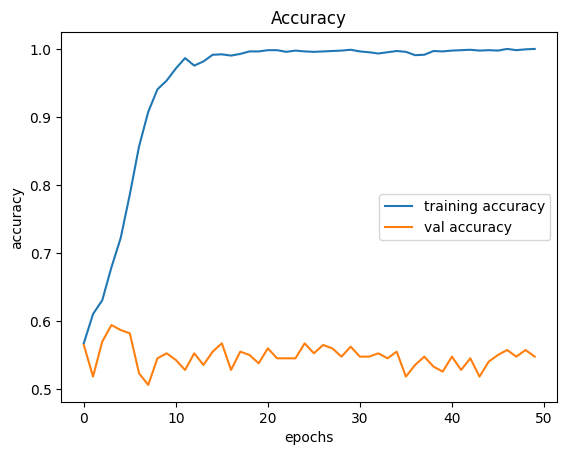

In [ ]:
# Accuracy

# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

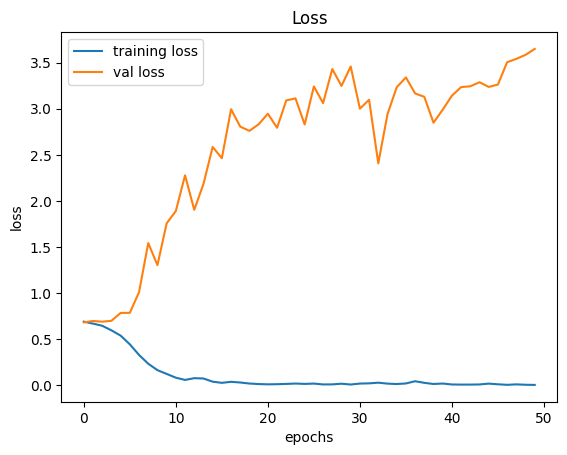

In [ ]:

# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Classification Report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       201
           1       0.55      0.57      0.56       208

   micro avg       0.55      0.55      0.55       409
   macro avg       0.55      0.55      0.55       409
weighted avg       0.55      0.55      0.55       409
 samples avg       0.55      0.55      0.55       409



In [ ]:
# Saving Model
# Serialize model to JSON
model_json = model.to_json()
with open("brain_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("brain_weight.h5")
model.save('brain_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
import cv2
import skimage.transform
import numpy as np
from PIL import Image
from IPython.display import display

def predict_deepfake(file_path, model):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img_resized = skimage.transform.resize(img, (224, 224, 3))
    x = np.expand_dims(img_resized, axis=0)

    preds = model.predict(x, batch_size=None, verbose=1)
    labels = np.argmax(preds, axis=-1)
    print("\nPREDICTION : " + categories[labels[0]])
    probs = np.exp(preds) / np.sum(np.exp(preds), axis=1, keepdims=True)
    all_percentages = probs * 100
    perc = max(all_percentages[0])

    # Display the image in Colab
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

    return str(perc)[0:5] + " % " + categories[labels[0]]


1/1 [==============================] - 0s 19ms/step

PREDICTION : training_real


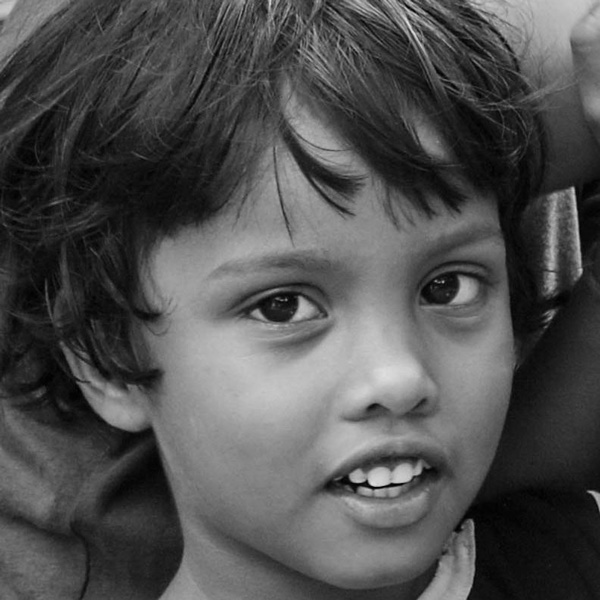

'73.10 % training_real'

In [ ]:
predict_deepfake("/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_real/real_00001.jpg",model)

1/1 [==============================] - 0s 19ms/step

PREDICTION : training_real


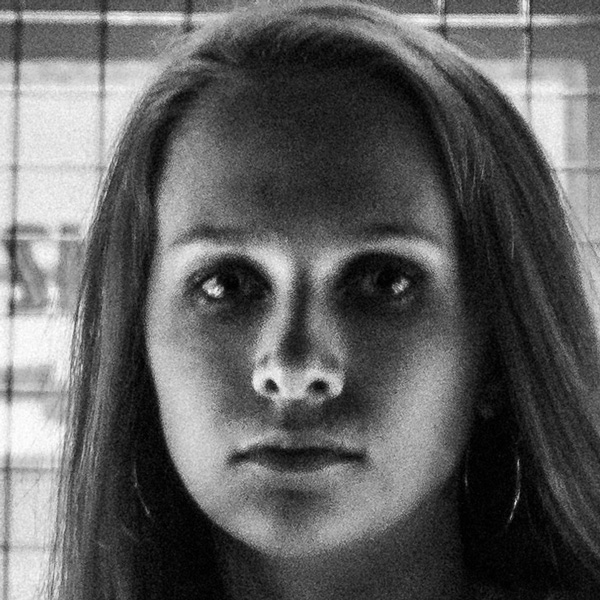

'73.10 % training_real'

In [ ]:
predict_deepfake("/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_real/real_00011.jpg",model)

1/1 [==============================] - 0s 19ms/step

PREDICTION : training_fake


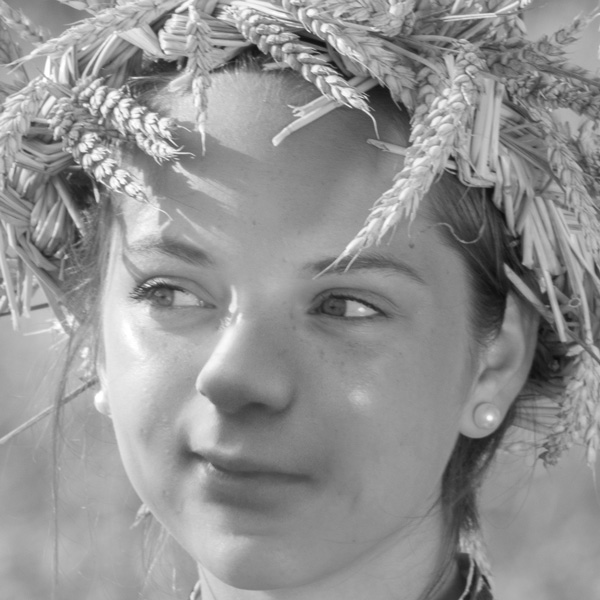

'72.97 % training_fake'

In [ ]:
predict_deepfake("/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/easy_106_0011.jpg",model)

1/1 [==============================] - 0s 19ms/step

PREDICTION : training_fake


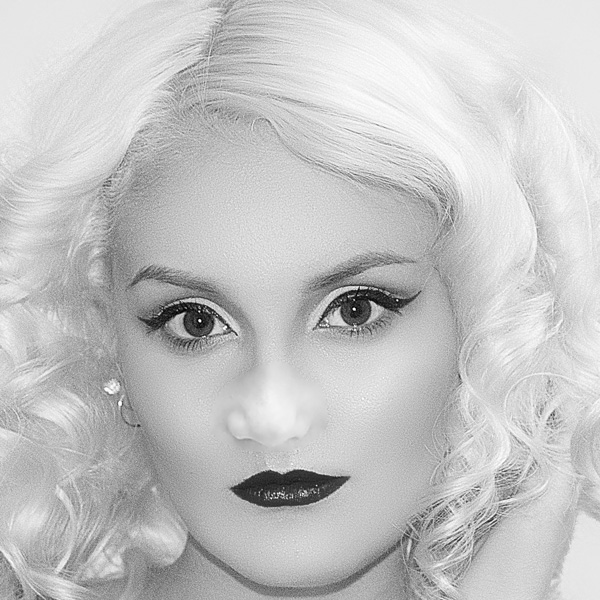

'73.10 % training_fake'

In [ ]:
predict_deepfake("/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/easy_115_0010.jpg",model)